# Hyperparameter tuning in keras - kerasTuner library
### The one of the main problem in the building the neural network is how many neurons to add in given layer or how many layers to add or which activation function to add and etc all the model related thing are controled and exammined by this library and it also give the best hyperparameter and the model back also
### Example
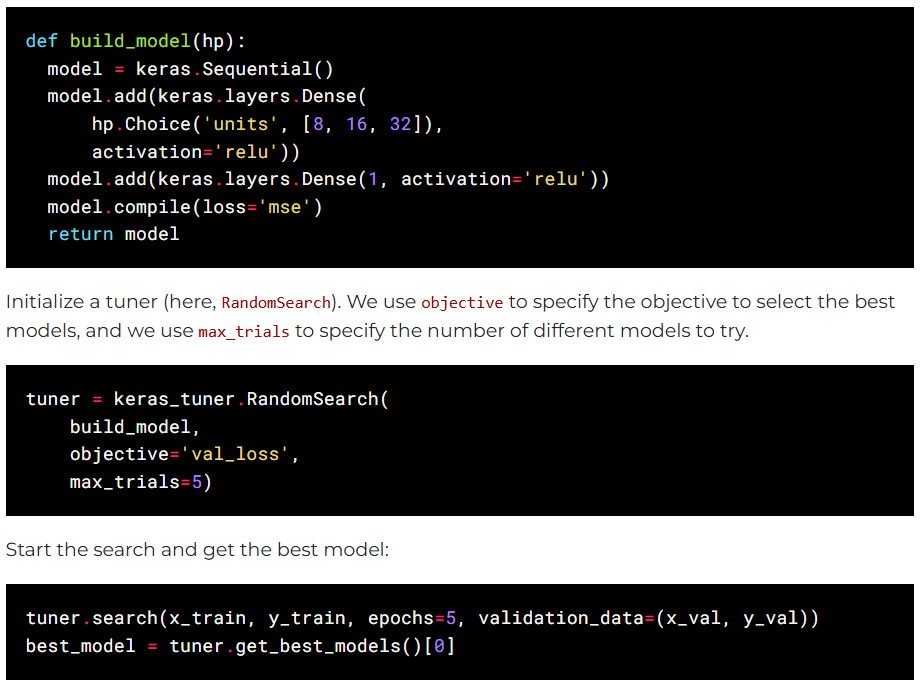

In [57]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adagrad,RMSprop,Adam
import keras_tuner as kt

### For this purpose we are building the model on the diabetes dataset

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape

(768, 9)

In [3]:
df.corr()['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [4]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Hyperparamter tuning the optimizer only

In [14]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32,activation='relu',input_dim=8)),
  model.add(Dense(1,activation='sigmoid'))
  optimizer_ = hp.Choice('optimizer',values = ['adam','rmsprop','momentum','adadelta'])
  model.compile(optimizer = optimizer_ ,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [15]:
## tuner object
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_loss',
    max_trials=10
)

Reloading Tuner from ./untitled_project/tuner0.json


In [16]:
## searching best model
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 04s]
val_loss: 0.4704763889312744

Best val_loss So Far: 0.4704763889312744
Total elapsed time: 00h 00m 47s


In [30]:
### getting best hyperparameter
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.get('optimizer'))

rmsprop


In [24]:
### getting best model
model = tuner.get_best_models()[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),initial_epoch=11) ## first 10 arew trained

Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8055 - loss: 0.4674 - val_accuracy: 0.7706 - val_loss: 0.4653
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7977 - loss: 0.4493 - val_accuracy: 0.7662 - val_loss: 0.4631
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7743 - loss: 0.4860 - val_accuracy: 0.7662 - val_loss: 0.4610
Epoch 15/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7950 - loss: 0.4753 - val_accuracy: 0.7706 - val_loss: 0.4598
Epoch 16/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8316 - loss: 0.4148 - val_accuracy: 0.7749 - val_loss: 0.4581
Epoch 17/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7718 - loss: 0.4902 - val_accuracy: 0.7792 - val_loss: 0.4570
Epoch 18/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7903 - loss: 0.4579 - val_accuracy: 0.7835 - val_loss: 0.4558
Epoch 19/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8116 - loss: 0.4374 - val_accu

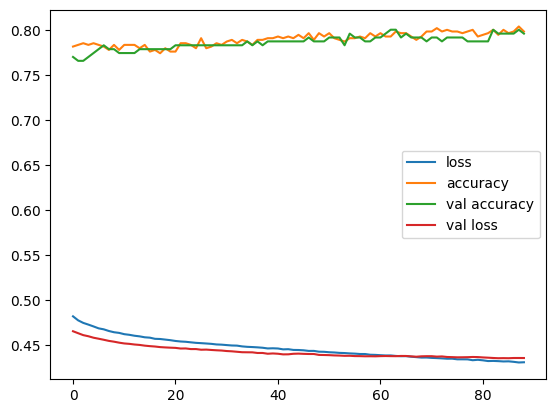

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.legend()

### hyperparameter tuning the model layer

In [43]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32,activation='relu',input_dim=8))
  for i in range(hp.Int('layers',min_value=1,max_value=10)):
    model.add(Dense(8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [45]:
tunner = kt.RandomSearch(build_model,objective='val_loss',max_trials=5,
                         directory='tunner_class',project_name='layers')

In [46]:
tunner.search(
    X_train,y_train,
    epochs=5,
    validation_data = (X_test,y_test)
)

Trial 5 Complete [00h 00m 04s]
val_loss: 0.5719440579414368

Best val_loss So Far: 0.5149253606796265
Total elapsed time: 00h 00m 19s


In [47]:
tunner.get_best_hyperparameters(num_trials=1)[0].values

{'layers': 1}

## Hyperparemater tuning the number of neurons in the layer

In [52]:
def build_model(hp):
  model = Sequential()
  units_ = hp.Int('neurons',min_value=1,max_value=128)
  model.add(Dense(units=units_,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [53]:
tunner_neuron = kt.RandomSearch(
    build_model,
    objective = 'val_loss',
    max_trials = 10,
    directory = 'tunner_class',
    project_name = 'neurons'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
tunner_neuron.search(
    X_train,y_train,
    epochs=10,
    validation_data = (X_test,y_test)
)

Trial 10 Complete [00h 00m 05s]
val_loss: 0.44560858607292175

Best val_loss So Far: 0.4434570074081421
Total elapsed time: 00h 00m 42s


In [55]:
tunner_neuron.get_best_hyperparameters(num_trials=1)[0].values

{'neurons': 73}

## Building Full model

In [83]:
def build_model(hp):
  count = 0
  model = Sequential()
  for i in range(hp.Int('layers',min_value=1,max_value=10)):
    ## initial layer
    if(count == 0):
      units_ = hp.Int(f'neurons_{i}',min_value=1,max_value=128,step=8)
      activation_ = hp.Choice(f'activation_{i}',values=['relu','tanh','selu'])
      model.add(Dense(units = units_,
                    activation = activation_
                    ,input_dim=8))
    else:
      units_ = hp.Int(f'neurons_{i}',min_value=1,max_value=128,step=8)
      activation_ = hp.Choice(f'activation_{i}',values=['relu','tanh','selu'])
      dropout_ = hp.Choice(f'drop_out_{i}',values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
      model.add(Dense(
          units = units_,
          activation = activation_
      ))
      model.add(Dropout(dropout_))
    count+=1
  model.add(Dense(1,activation='sigmoid'))
  optimizer_ = hp.Choice('optimizer',values=['adam','rmsprop','adadelta','sgd','momentum'])
  model.compile(optimizer=optimizer_,loss='binary_crossentropy')
  return model


In [84]:
tunner_final = kt.RandomSearch(
    build_model,
    objective = 'val_loss',
    max_trials = 10,
    directory = 'tunner_class',
    project_name = 'final'
)

Reloading Tuner from tunner_class/final/tuner0.json


In [85]:
tunner_final.search(
    X_train,y_train,
    validation_data = (X_test,y_test),
    batch_size = 32,
    epochs = 20
)

Trial 10 Complete [00h 00m 01s]

Best val_loss So Far: 0.42764151096343994
Total elapsed time: 00h 12m 38s


In [86]:
tunner_final.get_best_hyperparameters(num_trials=1)[0].values

{'layers': 5,
 'neurons_0': 89,
 'activations_0': 'selu',
 'nurons_1': 57,
 'activation_0': 'selu',
 'neurons_1': 97,
 'activation_1': 'tanh',
 'drop_out_1': 0.4,
 'neurons_2': 121,
 'activation_2': 'relu',
 'drop_out_2': 0.7,
 'neurons_3': 41,
 'activation_3': 'selu',
 'drop_out_3': 0.3,
 'neurons_4': 105,
 'activation_4': 'selu',
 'drop_out_4': 0.1,
 'neurons_5': 89,
 'activation_5': 'selu',
 'drop_out_5': 0.6,
 'neurons_6': 9,
 'activation_6': 'selu',
 'drop_out_6': 0.5,
 'neurons_7': 81,
 'activation_7': 'tanh',
 'drop_out_7': 0.7,
 'neurons_8': 121,
 'activation_8': 'relu',
 'drop_out_8': 0.2,
 'neurons_9': 73,
 'activation_9': 'selu',
 'drop_out_9': 0.3,
 'optimizer': 'adam'}

In [88]:
model = tunner_final.get_best_models()[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [89]:
history = model.fit(X_train,y_train,
                    epochs=100,initial_epoch=20,validation_data=(X_test,y_test))

Epoch 21/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4994 - val_loss: 0.4280
Epoch 22/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5729 - val_loss: 0.4359
Epoch 23/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5152 - val_loss: 0.4363
Epoch 24/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5500 - val_loss: 0.4370
Epoch 25/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5520 - val_loss: 0.4345
Epoch 26/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4704 - val_loss: 0.4333
Epoch 27/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4977 - val_loss: 0.4350
Epoch 28/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5015 - val_loss: 0.4339
Epoch 29/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5421 - val_loss: 0.4413
Epoch 30/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5101 - val_loss: 0.4346
Epoch 31/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4734 - val_loss: 0.4404
Epoch 32/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

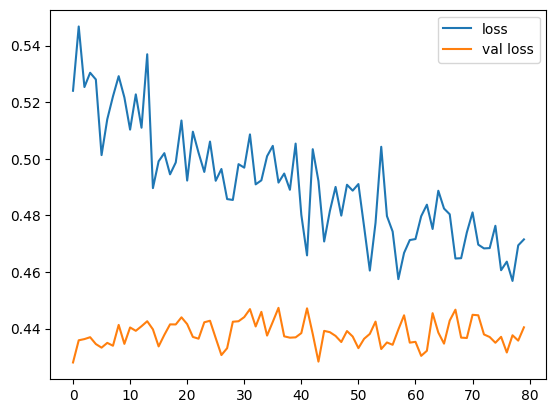

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.legend()